In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
stock_symbol = "IBM"
epoch_count = 10
data = pd.read_csv('csv/' + str(stock_symbol) + '.timeseries.csv', date_parser = True)
data.tail()

,date,open,high,low,close,volume,adjclose
12606,1970-01-08,18.437500,18.475000,18.375000,18.475000,707200,1.551029
12607,1970-01-07,18.424999,18.437500,18.312500,18.437500,457600,1.547883
12608,1970-01-06,18.412500,18.450001,18.312500,18.424999,488000,1.546832
12609,1970-01-05,18.299999,18.412500,18.299999,18.412500,424000,1.545784
12610,1970-01-02,18.225000,18.287500,18.200001,18.237499,315200,1.531091


In [3]:
data_training = data[data['date'] < '2019-01-01'].sort_values(by='date', ascending=True).copy()
data_training

,date,open,high,low,close,volume,adjclose
12610,1970-01-02,18.225000,18.287500,18.200001,18.237499,315200,1.531091
12609,1970-01-05,18.299999,18.412500,18.299999,18.412500,424000,1.545784
12608,1970-01-06,18.412500,18.450001,18.312500,18.424999,488000,1.546832
12607,1970-01-07,18.424999,18.437500,18.312500,18.437500,457600,1.547883
12606,1970-01-08,18.437500,18.475000,18.375000,18.475000,707200,1.551029
...,...,...,...,...,...,...,...
254,2018-12-24,109.900002,111.000000,107.500000,107.570000,3821400,102.646774
253,2018-12-26,108.000000,111.389999,105.940002,111.389999,6645800,106.291939
252,2018-12-27,109.989998,113.779999,109.470001,113.779999,6045600,108.572556
251,2018-12-28,114.220001,114.800003,112.500000,113.029999,5117500,107.856880


In [4]:
data_test = data[data['date'] >= '2019-01-01'].sort_values(by='date', ascending=True).copy()
data_test

,date,open,high,low,close,volume,adjclose
249,2019-01-02,112.010002,115.980003,111.690002,115.209999,4239900,109.937111
248,2019-01-03,114.529999,114.879997,112.690002,112.910004,4346700,107.742371
247,2019-01-04,114.910004,117.489998,114.440002,117.320000,4477800,111.950539
246,2019-01-07,117.500000,118.830002,116.669998,118.150002,3751200,112.742554
245,2019-01-08,119.660004,120.570000,118.980003,119.830002,4763600,114.345657
...,...,...,...,...,...,...,...
4,2019-12-20,135.740005,136.419998,134.949997,135.589996,7111800,135.589996
3,2019-12-23,135.779999,136.149994,135.000000,135.550003,2803200,135.550003
2,2019-12-24,135.610001,135.619995,134.610001,134.979996,1202100,134.979996
1,2019-12-26,134.979996,135.309998,134.649994,134.910004,2129700,134.910004


In [5]:
training_data = data_training.drop(['date', 'adjclose'], axis = 1)
training_data.head()

,open,high,low,close,volume
12610,18.225000,18.287500,18.200001,18.237499,315200
12609,18.299999,18.412500,18.299999,18.412500,424000
12608,18.412500,18.450001,18.312500,18.424999,488000
12607,18.424999,18.437500,18.312500,18.437500,457600
12606,18.437500,18.475000,18.375000,18.475000,707200


In [6]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.04237906, 0.04105061, 0.04291859, 0.04235336, 0.00453886],
       [0.04274334, 0.04165719, 0.04340664, 0.04320165, 0.00610558],
       [0.04328978, 0.04183917, 0.04346765, 0.04326224, 0.00702717],
       ...,
       [0.48809984, 0.50444476, 0.48836897, 0.50547745, 0.08705632],
       [0.50864581, 0.50939451, 0.50315712, 0.50184196, 0.07369173],
       [0.5043229 , 0.50721078, 0.50276666, 0.50494424, 0.07175206]])

In [7]:
x_train = []
y_train = []

In [8]:
training_data.shape[0]

12361

In [9]:
for i in range(60, training_data.shape[0]):
    x_train.append(training_data[i-60:i])
    y_train.append(training_data[i, 0])

In [10]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
x_train.shape, y_train.shape

((12301, 60, 5), (12301,))

In [12]:
### Building LSTM

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

C:\Users\reggl\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\reggl\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\reggl\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\reggl\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passi

In [14]:
regressior = Sequential()

regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 5)))
regressior.add(Dropout(0.2))
               
regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 120, activation = 'relu'))
regressior.add(Dropout(0.2))

regressior.add(Dense(units = 1))

In [15]:
regressior.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
unified_lstm (UnifiedLSTM)   (None, 60, 60)            15840     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60)            0         
_________________________________________________________________
unified_lstm_1 (UnifiedLSTM) (None, 60, 60)            29040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
unified_lstm_2 (UnifiedLSTM) (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
unified_lstm_3 (UnifiedLSTM) (None, 120)               9

In [16]:
regressior.compile(optimizer='sgd', metrics=['mae', 'acc', 'msle'], loss = 'mean_squared_error')

In [17]:
regressior.fit(x_train, y_train, epochs=epoch_count, batch_size=32)

Epoch 1/10
12301/12301 [==============================] - 179s 15ms/sample - loss: 0.0998 - mae: 0.2248 - acc: 8.1294e-05 - msle: 0.0531
Epoch 2/10
12301/12301 [==============================] - 171s 14ms/sample - loss: 0.0713 - mae: 0.2236 - acc: 8.1294e-05 - msle: 0.0374
Epoch 3/10
12301/12301 [==============================] - 170s 14ms/sample - loss: 0.0663 - mae: 0.2222 - acc: 8.1294e-05 - msle: 0.0355
Epoch 4/10
12301/12301 [==============================] - 167s 14ms/sample - loss: 0.0627 - mae: 0.2172 - acc: 8.1294e-05 - msle: 0.0337
Epoch 5/10
12301/12301 [==============================] - 169s 14ms/sample - loss: 0.0579 - mae: 0.2084 - acc: 8.1294e-05 - msle: 0.0310
Epoch 6/10
12301/12301 [==============================] - 170s 14ms/sample - loss: 0.0529 - mae: 0.1995 - acc: 8.1294e-05 - msle: 0.0284
Epoch 7/10
12301/12301 [==============================] - 170s 14ms/sample - loss: 0.0469 - mae: 0.1875 - acc: 8.1294e-05 - msle: 0.0251
Epoch 8/10
12301/12301 [=================

In [18]:
### Prepare test dataset

In [19]:
data_test.tail()

,date,open,high,low,close,volume,adjclose
4,2019-12-20,135.740005,136.419998,134.949997,135.589996,7111800,135.589996
3,2019-12-23,135.779999,136.149994,135.000000,135.550003,2803200,135.550003
2,2019-12-24,135.610001,135.619995,134.610001,134.979996,1202100,134.979996
1,2019-12-26,134.979996,135.309998,134.649994,134.910004,2129700,134.910004
0,2019-12-27,135.000000,135.750000,134.869995,135.270004,2752200,135.270004


In [20]:
data_training.tail(60)

,date,open,high,low,close,volume,adjclose
309,2018-10-04,151.690002,152.800003,150.360001,151.309998,4237900,142.569092
308,2018-10-05,150.899994,151.789993,147.869995,149.029999,4602200,140.420822
307,2018-10-08,148.500000,149.070007,147.179993,148.389999,3239300,139.817764
306,2018-10-09,148.080002,148.360001,146.929993,147.240005,3642400,138.734222
305,2018-10-10,147.500000,147.690002,142.500000,142.690002,5547700,134.447052
304,2018-10-11,142.619995,144.190002,138.779999,139.020004,8710500,130.989075
303,2018-10-12,141.119995,141.539993,139.080002,140.850006,6563400,132.713348
302,2018-10-15,140.380005,142.259995,140.139999,141.130005,4965500,132.977203
301,2018-10-16,142.929993,145.449997,141.580002,145.119995,8695500,136.736679
300,2018-10-17,135.889999,137.149994,133.419998,134.050003,19464000,126.306183


In [21]:
past_60_days = data_training.tail(60)

In [22]:
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['date', 'adjclose'], axis = 1)
df.head()

,open,high,low,close,volume
0,151.690002,152.800003,150.360001,151.309998,4237900
1,150.899994,151.789993,147.869995,149.029999,4602200
2,148.500000,149.070007,147.179993,148.389999,3239300
3,148.080002,148.360001,146.929993,147.240005,3642400
4,147.500000,147.690002,142.500000,142.690002,5547700


In [23]:
inputs = scaler.transform(df)
inputs

array([[0.69064503, 0.69379619, 0.68793581, 0.68739697, 0.06102554],
       [0.6868078 , 0.68889494, 0.67578315, 0.67634511, 0.06627144],
       [0.67515056, 0.67569573, 0.67241554, 0.67324284, 0.04664575],
       ...,
       [0.61254127, 0.61042718, 0.61106671, 0.6082404 , 0.01731018],
       [0.60948122, 0.60892286, 0.6112619 , 0.60790112, 0.03066757],
       [0.60957838, 0.61105805, 0.61233563, 0.60964616, 0.03963153]])

In [24]:
x_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    x_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

In [25]:
x_test, y_test = np.array(x_test),np.array(y_test)
x_test.shape, y_test.shape

((250, 60, 5), (250,))

In [26]:
y_pred = regressior.predict(x_test)

In [27]:
my_scale = scaler.scale_
my_scale[0]

0.0048571982527842025

In [28]:
scale = 1/my_scale[0]
scale

205.8800048828125

In [29]:
y_pred = y_pred*scale
y_test = y_test*scale

In [30]:
### Visualize Data 

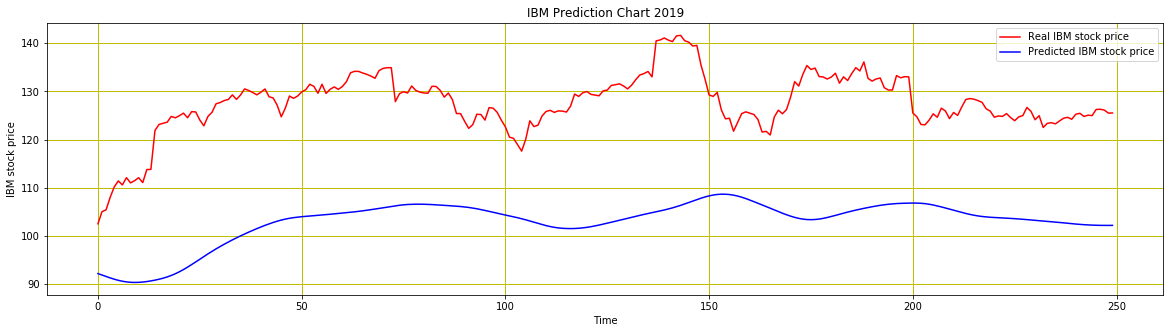

In [31]:
plt.figure(figsize=(20,5))
plt.plot(y_test, color = 'red', label = 'Real ' + stock_symbol + ' stock price')
plt.plot(y_pred, color = 'blue', label = 'Predicted ' + stock_symbol + ' stock price')
plt.title(stock_symbol + ' Prediction Chart 2019')
plt.grid(color='y', linestyle='-', linewidth=1)
plt.xlabel('Time')
plt.ylabel(stock_symbol + ' stock price')
plt.legend()
plt.show()